### Advanced Machine Learning

# Home Exercise #4

Assignment Due: 17/05/21 23:59

Jonathan Schler

In [1]:
student1Name="" # student1 name here
student1ID="" # student1 ID here


student2Name="" # student2 name here
student2ID="" # student2 ID here


The goal of this homework is to try to solve the problem of predicting wine quality from review texts and other properties of the wine. You can find the dataset here:https://www.kaggle.com/zynicide/wine-reviews

While you can find several kernels on kaggle already, I highly recommend you start your ownsolution from scratch. For this homework, only use wine from the United States (only 42% of data). Feel free to subsample the data for building your model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
df_first=pd.read_csv("winemag-data_first150k.csv", index_col="Unnamed: 0")
df_first.head().T

0  \
country                                                     US   
description  This tremendous 100% varietal wine hails from ...   
designation                                  Martha's Vineyard   
points                                                      96   
price                                                    235.0   
province                                            California   
region_1                                           Napa Valley   
region_2                                                  Napa   
variety                                     Cabernet Sauvignon   
winery                                                   Heitz   

                                                             1  \
country                                                  Spain   
description  Ripe aromas of fig, blackberry and cassis are ...   
designation               Carodorum Selección Especial Reserva   
points                                                      96   
price                                                    110.0   
province                                        Northern Spain   
region_1                                                  Toro   
region_2                                                   NaN   
variety                                          Tinta de Toro   
winery                                 Bodega Carmen Rodríguez   

                                                             2  \
country                                                     US   
description  Mac Watson honors the memory of a wine once ma...   
designation                      Special Selected Late Harvest   
points                                                      96   
price                                                     90.0   
province                                            California   
region_1                                        Knights Valley   
region_2                                                Sonoma   
variety                                        Sauvignon Blanc   
winery                                                Macauley   

                                                             3  \
country                                                     US   
description  This spent 20 months in 30% new French oak, an...   
designation                                            Reserve   
points                                                      96   
price                                                     65.0   
province                                                Oregon   
region_1                                     Willamette Valley   
region_2                                     Willamette Valley   
variety                                             Pinot Noir   
winery                                                   Ponzi   

                                                             4  
country                                                 France  
description  This is the top wine from La Bégude, named aft...  
designation                                         La Brûlade  
points                                                      95  
price                                                     66.0  
province                                              Provence  
region_1                                                Bandol  
region_2                                                   NaN  
variety                                     Provence red blend  
winery                                    Domaine de la Bégude

In [3]:
df=df_first[df_first['country']=='US']
df.reset_index().tail()
df=df.drop(columns='country')
df.head().T

0  \
description  This tremendous 100% varietal wine hails from ...   
designation                                  Martha's Vineyard   
points                                                      96   
price                                                    235.0   
province                                            California   
region_1                                           Napa Valley   
region_2                                                  Napa   
variety                                     Cabernet Sauvignon   
winery                                                   Heitz   

                                                             2  \
description  Mac Watson honors the memory of a wine once ma...   
designation                      Special Selected Late Harvest   
points                                                      96   
price                                                     90.0   
province                                            California   
region_1                                        Knights Valley   
region_2                                                Sonoma   
variety                                        Sauvignon Blanc   
winery                                                Macauley   

                                                             3  \
description  This spent 20 months in 30% new French oak, an...   
designation                                            Reserve   
points                                                      96   
price                                                     65.0   
province                                                Oregon   
region_1                                     Willamette Valley   
region_2                                     Willamette Valley   
variety                                             Pinot Noir   
winery                                                   Ponzi   

                                                             8  \
description  This re-named vineyard was formerly bottled as...   
designation                                             Silice   
points                                                      95   
price                                                     65.0   
province                                                Oregon   
region_1                                    Chehalem Mountains   
region_2                                     Willamette Valley   
variety                                             Pinot Noir   
winery                                               Bergström   

                                                             9  
description  The producer sources from two blocks of the vi...  
designation                               Gap's Crown Vineyard  
points                                                      95  
price                                                     60.0  
province                                            California  
region_1                                          Sonoma Coast  
region_2                                                Sonoma  
variety                                             Pinot Noir  
winery                                               Blue Farm

In [4]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso, ElasticNet,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
        LogisticRegression(C=85, n_jobs=os.cpu_count()),
        LinearRegression(n_jobs=os.cpu_count()),
        Ridge(alpha=7.8, solver='sag'),
        Lasso(alpha=0.1),
        ElasticNet(alpha=0.1, l1_ratio=0.1),
        KNeighborsClassifier(n_neighbors=4),
        RandomForestClassifier(max_depth=12, warm_start=True,n_jobs=os.cpu_count(), n_estimators=500)
        ]

In [5]:
def transform_points_simplified(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

df = df.assign(points_simplified = df['points'].apply(transform_points_simplified))
df.head()

description  \
0  This tremendous 100% varietal wine hails from ...   
2  Mac Watson honors the memory of a wine once ma...   
3  This spent 20 months in 30% new French oak, an...   
8  This re-named vineyard was formerly bottled as...   
9  The producer sources from two blocks of the vi...   

                     designation  points  price    province  \
0              Martha's Vineyard      96  235.0  California   
2  Special Selected Late Harvest      96   90.0  California   
3                        Reserve      96   65.0      Oregon   
8                         Silice      95   65.0      Oregon   
9           Gap's Crown Vineyard      95   60.0  California   

             region_1           region_2             variety     winery  \
0         Napa Valley               Napa  Cabernet Sauvignon      Heitz   
2      Knights Valley             Sonoma     Sauvignon Blanc   Macauley   
3   Willamette Valley  Willamette Valley          Pinot Noir      Ponzi   
8  Chehalem Mountains  Willamette Valley          Pinot Noir  Bergström   
9        Sonoma Coast             Sonoma          Pinot Noir  Blue Farm   

   points_simplified  
0                  5  
2                  5  
3                  5  
8                  4  
9                  4

In [6]:
df = df.add_suffix('_col')
df.columns.to_list()
df = df.drop(columns='points_col')
df = df.dropna()
df.head().T

0  \
description_col        This tremendous 100% varietal wine hails from ...   
designation_col                                        Martha's Vineyard   
price_col                                                          235.0   
province_col                                                  California   
region_1_col                                                 Napa Valley   
region_2_col                                                        Napa   
variety_col                                           Cabernet Sauvignon   
winery_col                                                         Heitz   
points_simplified_col                                                  5   

                                                                       2  \
description_col        Mac Watson honors the memory of a wine once ma...   
designation_col                            Special Selected Late Harvest   
price_col                                                           90.0   
province_col                                                  California   
region_1_col                                              Knights Valley   
region_2_col                                                      Sonoma   
variety_col                                              Sauvignon Blanc   
winery_col                                                      Macauley   
points_simplified_col                                                  5   

                                                                       3  \
description_col        This spent 20 months in 30% new French oak, an...   
designation_col                                                  Reserve   
price_col                                                           65.0   
province_col                                                      Oregon   
region_1_col                                           Willamette Valley   
region_2_col                                           Willamette Valley   
variety_col                                                   Pinot Noir   
winery_col                                                         Ponzi   
points_simplified_col                                                  5   

                                                                       8  \
description_col        This re-named vineyard was formerly bottled as...   
designation_col                                                   Silice   
price_col                                                           65.0   
province_col                                                      Oregon   
region_1_col                                          Chehalem Mountains   
region_2_col                                           Willamette Valley   
variety_col                                                   Pinot Noir   
winery_col                                                     Bergström   
points_simplified_col                                                  4   

                                                                       9  
description_col        The producer sources from two blocks of the vi...  
designation_col                                     Gap's Crown Vineyard  
price_col                                                           60.0  
province_col                                                  California  
region_1_col                                                Sonoma Coast  
region_2_col                                                      Sonoma  
variety_col                                                   Pinot Noir  
winery_col                                                     Blue Farm  
points_simplified_col                                                  4

## Task 1 Bag of Words and simple Features [50pts]

1.1 Create a baseline model for predicting wine quality using only non-text features.





In [7]:
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.isna().sum()

price_col                0
points_simplified_col    0
dtype: int64

In [9]:
df_numeric = df_numeric.dropna()
df_numeric.info

<bound method DataFrame.info of         price_col  points_simplified_col
0           235.0                      5
2            90.0                      5
3            65.0                      5
8            65.0                      4
9            60.0                      4
...           ...                    ...
150889       35.0                      1
150892       10.0                      1
150914       25.0                      4
150915       30.0                      4
150916       65.0                      4

[39241 rows x 2 columns]>

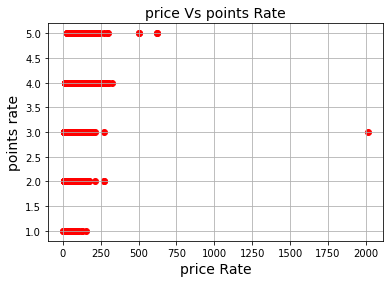

In [10]:
plt.scatter(df_numeric['price_col'], df_numeric['points_simplified_col'], color='red')
plt.title('price Vs points Rate', fontsize=14)
plt.xlabel('price Rate', fontsize=14)
plt.ylabel('points rate', fontsize=14)
plt.grid(True)
plt.show()


In [11]:
df_numeric.shape

(39241, 2)

In [12]:
from sklearn.preprocessing import StandardScaler
def runModels(x_train,x_test,y_train,y_test, withScaler=False):
    scaler = StandardScaler()
    for model in models:
        if withScaler:
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
        m = model.fit(x_train, y_train)
        print(model, m.score(x_test, y_test))


In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
def runSVC(x_train,x_test,y_train,y_test):
    clf = make_pipeline(SVC(gamma='auto'))
    clf.fit(x_train, y_train)
    clf.score(x_test,y_test)
    print(SVC(), clf.score(x_test, y_test))

In [14]:
from sklearn.model_selection import train_test_split

x= df_numeric.iloc[:,1].values.reshape(-1, 1)
y=df_numeric.iloc[:,0].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [15]:
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix,classification_report

runModels(x_train, x_test, y_train, y_test, True)
runSVC(x_train, x_test, y_train, y_test)







C:\Users\eugene_s\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
LogisticRegression(C=100, n_jobs=12) 0.06030748322432685
LinearRegression(n_jobs=12) 0.13286297678024117
Ridge() 0.13286284608850962
Lasso(alpha=0.1) 0.13281967130731587
ElasticNet() 0.11445587729100115
C:\Users\eugene_s\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
KNeighborsClassifier(n_neighbors=4) 0.02836999915059883
<ipython-input-12-800e94ee124e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

In [16]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# clf = make_pipeline(SVC(gamma='auto'))
# clf.fit(x_train, y_train)
# clf.score(x_test,y_test)


In [17]:
# from sklearn.neighbors import KNeighborsClassifier


# knn = KNeighborsClassifier(n_neighbors=4, n_jobs=os.cpu_count())
# knn.fit(x_train, y_train)
# knn.score(x_test,y_test)

1.2 Create a simple text-based model using a bag-of-words approach and a linear model.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#Vectorization

vect = CountVectorizer(stop_words='english',token_pattern=r"[a-zA-Z]+", min_df=2,max_features=50)
description = vect.fit_transform(df['description_col'])

#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:40])
print(feature_names[::2000])





['acidity', 'alcohol', 'aromas', 'bit', 'black', 'blackberry', 'blend', 'cabernet', 'cherries', 'cherry', 'chocolate', 'cola', 'complex', 'crisp', 'dark', 'drink', 'dry', 'fine', 'finish', 'flavors', 'fruit', 'good', 'just', 'like', 'little', 'notes', 'oak', 'palate', 'pepper', 'pinot', 'raspberry', 'red', 'rich', 'ripe', 's', 'sauvignon', 'shows', 'soft', 'spice', 'spicy']
['acidity']


In [20]:
x_train, x_test, y_train, y_test = train_test_split(description, df['points_simplified_col'], test_size=0.30, random_state=42, stratify=df['points_simplified_col'])


In [21]:
print(x_train.shape)
print(x_test.shape)

(27468, 50)
(11773, 50)


In [22]:
runModels(x_train, x_test, y_train, y_test, False)
runSVC(x_train, x_test, y_train, y_test)


LogisticRegression(C=100, n_jobs=12) 0.48585747048330924
LinearRegression(n_jobs=12) 0.2721220437977696
Ridge() 0.27211194478623735
Lasso(alpha=0.1) 0.001940211185384455
ElasticNet() -2.8619144831765198e-09
KNeighborsClassifier(n_neighbors=4) 0.49613522466661003
RandomForestClassifier(max_depth=15, n_estimators=500, n_jobs=12,
                       random_state=42) 0.5874458506752739
SVC() 0.48390384778730994


In [24]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(n_jobs=os.cpu_count()).fit(x_train, y_train)
# lr.score(x_test, y_test)


In [25]:
# model = LinearRegression(n_jobs=os.cpu_count()).fit(x_train,y_train)
# model.score(x_test,y_test)

1.3 Try using n-grams, characters, tf-idf rescaling and possibly other ways to tune the BoW model. Be aware that you might need to adjust the (regularization of the) linear model for different feature sets.


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 3), stop_words='english',token_pattern=r"[a-zA-Z]+")
description = vect.fit_transform(df['description_col'])

#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:40])
print(feature_names[::2000])

x_train, x_test, y_train, y_test = train_test_split(description, df['points_simplified_col'], test_size=0.30, random_state=42, stratify=df['points_simplified_col'])


['aaron', 'aaron pott', 'aaron pott blend', 'abacela', 'abacela crafted', 'abacela crafted fragrant', 'abacela great', 'abacela great year', 'abacela s', 'abacela s tenth', 'abacela showcases', 'abacela showcases spicy', 'abacela vineyards', 'abacela vineyards z', 'abandon', 'abandon midpalate', 'abandoned', 'abandoned sangiovese', 'abandoned sangiovese quest', 'abandoned trace', 'abandoned trace salinity', 'abandoning', 'abandoning efforts', 'abandoning efforts varietals', 'abbey', 'abbey ridge', 'abbey ridge bottling', 'abbey serve', 'abbey serve aromas', 'abbinare', 'abbinare miscela', 'abbinare miscela bit', 'abbott', 'abbott claim', 'abbott claim bit', 'abbreviated', 'abbreviated finish', 'abbreviated finish best', 'abbreviated growing', 'abbreviated growing season']
['aaron', 'accessible forward', 'acidic young wine', 'acidity highlighting complex', 'acidity sommeliers', 'acids taste natural', 'adds mushroomy appeal', 'ageable s fairly', 'aix', 'alcohol way rustic', 'american oak

In [27]:
runModels(x_train, x_test, y_train, y_test, False)
runSVC(x_train, x_test, y_train, y_test)

LogisticRegression(C=100, n_jobs=12) 0.8040431495795464
LinearRegression(n_jobs=12) 0.8113178884120535
Ridge(alpha=7.8) 0.8109422849325079
Lasso(alpha=0.1) 0.001940211185384455
ElasticNet() -2.8619144831765198e-09
KNeighborsClassifier(n_neighbors=4) 0.16996517455194088
RandomForestClassifier(max_depth=15, n_estimators=500, n_jobs=12,
                       random_state=42) 0.46411280047566467
SVC() 0.36796058778561114


In [ ]:
# model = LinearRegression(n_jobs=os.cpu_count()).fit(x_train,y_train)
# model.score(x_test,y_test)

In [28]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(27468, 735796) (27468,)
(11773, 735796) (11773,)


In [29]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# clf = make_pipeline(SVC(gamma='auto'))
# clf.fit(x_train, y_train)
# clf.score(x_test,y_test)



1.4 Combine the non-text features and the text features. How does adding those features improve upon just using bag-of-words?

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# df=df df_first[df_first['country']=='US']
x = df['description_col']

vect = CountVectorizer(ngram_range=(1, 5), stop_words='english',token_pattern=r"[a-zA-Z]+", max_features=350)
description = vect.fit_transform(x)

df_with_all_features = pd.DataFrame(description.toarray(), columns=vect.get_feature_names(),index=df.index)
df_all = pd.concat([df,df_with_all_features],axis=1)
df_all.reset_index(drop=True)
# print(df_all.isna().sum(),df_all.shape)

df_all = df_all.drop(['designation_col','description_col'], axis=1)
df_all = df_all[df_all['price_col'].notna()]


In [31]:
df_all


price_col province_col        region_1_col             region_2_col  \
0           235.0   California         Napa Valley                     Napa   
2            90.0   California      Knights Valley                   Sonoma   
3            65.0       Oregon   Willamette Valley        Willamette Valley   
8            65.0       Oregon  Chehalem Mountains        Willamette Valley   
9            60.0   California        Sonoma Coast                   Sonoma   
...           ...          ...                 ...                      ...   
150889       35.0   California   Santa Ynez Valley            Central Coast   
150892       10.0   California          California         California Other   
150914       25.0   California     Anderson Valley  Mendocino/Lake Counties   
150915       30.0   California         North Coast              North Coast   
150916       65.0   California         Napa Valley                     Napa   

               variety_col   winery_col  points_simplified_col  accented  \
0       Cabernet Sauvignon        Heitz                      5         0   
2          Sauvignon Blanc     Macauley                      5         0   
3               Pinot Noir        Ponzi                      5         0   
8               Pinot Noir    Bergström                      4         0   
9               Pinot Noir    Blue Farm                      4         0   
...                    ...          ...                    ...       ...   
150889          Pinot Noir       Lafond                      1         0   
150892              Merlot     Callaway                      1         0   
150914      White Riesling      Navarro                      4         0   
150915         White Blend     Beringer                      4         0   
150916     Champagne Blend  Schramsberg                      4         0   

        acid  acidic  ...  winemaker  winery  winery s  wines  wrapped  year  \
0          0       0  ...          0       0         0      0        0     0   
2          0       0  ...          0       0         0      0        0     0   
3          0       0  ...          0       0         0      0        0     0   
8          0       0  ...          0       0         0      0        0     0   
9          0       0  ...          0       0         0      0        0     0   
...      ...     ...  ...        ...     ...       ...    ...      ...   ...   
150889     0       0  ...          0       0         0      0        0     0   
150892     0       0  ...          0       0         0      0        0     0   
150914     0       0  ...          0       0         0      0        0     0   
150915     0       0  ...          1       0         0      0        0     0   
150916     0       0  ...          0       0         0      0        0     0   

        years  young  zin  zinfandel  
0           2      0    0          0  
2           0      0    0          0  
3           0      0    0          0  
8           0      0    0          0  
9           0      0    0          0  
...       ...    ...  ...        ...  
150889      0      0    0          0  
150892      0      0    0          0  
150914      0      0    0          0  
150915      0      0    0          0  
150916      0      0    0          0  

[39241 rows x 357 columns]

In [32]:
df_all.isna().sum()

price_col       0
province_col    0
region_1_col    0
region_2_col    0
variety_col     0
               ..
year            0
years           0
young           0
zin             0
zinfandel       0
Length: 357, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
y= df_all['points_simplified_col']
df_all = df_all.drop(columns='points_simplified_col')
x_train, x_test, y_train, y_test = train_test_split(df_all, y, test_size=0.30, random_state=42)




In [34]:
col_categorical = ['variety_col','region_2_col','region_1_col','province_col','winery_col']
for col in col_categorical:
    le = LabelEncoder()
    print(col)
    le.fit(x_train[col])
    c = len(le.classes_) +1
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    x_train[col +'_code'] = x_train[col].apply(lambda x: le_dict.get(x))
    x_test[col +'_code'] = x_test[col].apply(lambda x: le_dict.get(x,c))
    x_train= x_train.drop(columns=col)
    x_test =x_test.drop(columns=col)



variety_col
region_2_col
<ipython-input-34-56f97c02ead8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col +'_code'] = x_train[col].apply(lambda x: le_dict.get(x))
<ipython-input-34-56f97c02ead8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col +'_code'] = x_test[col].apply(lambda x: le_dict.get(x,c))
region_1_col
province_col
winery_col


In [35]:
x_train.head(n=10)

price_col  accented  acid  acidic  acidity  acids  adds  age  aging  \
63503        30.0         0     0       0        0      0     0    0      0   
59133        15.0         0     1       0        0      0     0    1      0   
100163        9.0         0     0       0        0      0     0    0      0   
12953        39.0         0     0       0        0      0     0    0      0   
115677       45.0         0     0       0        0      0     0    1      0   
80928        28.0         0     0       0        0      0     0    0      0   
44324        35.0         0     0       0        0      0     0    0      0   
143350       20.0         0     0       0        0      0     0    0      0   
19007        19.0         0     0       0        0      0     0    0      0   
53609        24.0         0     0       0        0      0     0    0      0   

        alcohol  ...  year  years  young  zin  zinfandel  variety_col_code  \
63503         0  ...     0      0      0    0          0                37   
59133         0  ...     0      0      0    0          0                22   
100163        0  ...     0      0      0    1          0               171   
12953         0  ...     0      0      0    0          0               105   
115677        0  ...     0      0      0    0          0                22   
80928         0  ...     0      0      0    0          0               120   
44324         0  ...     0      1      0    0          0               171   
143350        0  ...     0      0      0    0          0                37   
19007         0  ...     0      0      0    1          0               171   
53609         0  ...     0      0      0    0          0               105   

        region_2_col_code  region_1_col_code  province_col_code  \
63503                   7                100                  0   
59133                   3                 59                  3   
100163                  0                 16                  0   
12953                  13                135                  0   
115677                  3                195                  3   
80928                   3                130                  3   
44324                  13                135                  0   
143350                  1                 23                  0   
19007                  13                115                  0   
53609                   6                 58                  0   

        winery_col_code  
63503              2240  
59133               662  
100163              985  
12953              1443  
115677             3077  
80928               223  
44324              3106  
143350              827  
19007              2326  
53609               359  

[10 rows x 356 columns]

In [36]:
runModels(x_train, x_test, y_train, y_test, False)
runSVC(x_train, x_test, y_train, y_test)

LogisticRegression(C=100, n_jobs=12) 0.6314448313938673
LinearRegression(n_jobs=12) 0.5441770882021304
Ridge() 0.5441816921503977
Lasso(alpha=0.1) 0.20831200909502434
ElasticNet() -0.0002401111192515959
KNeighborsClassifier(n_neighbors=4) 0.3292278943344942
RandomForestClassifier(max_depth=15, n_estimators=500, n_jobs=12,
                       random_state=42) 0.6277924063535207
SVC() 0.5960248025142275


In [37]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.metrics import confusion_matrix,classification_report

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# lr = LinearRegression(n_jobs=os.cpu_count()).fit(x_train, y_train)
# lr.score(x_test, y_test)


0.5441782590598064

In [38]:
# lr = LogisticRegression(n_jobs=os.cpu_count()).fit(x_train, y_train)
# lr.score(x_test, y_test)

0.6318695319799541

In [39]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=4, n_jobs=os.cpu_count())
# knn.fit(x_train, y_train)
# print(knn.score(x_test,y_test))

0.3292278943344942


In [40]:

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(x_train, y_train)
# clf.score(x_test,y_test)


## Task 2 Word Vectors [50pts]

Use a pretrained word-embedding (word2vec, glove or fasttext) for featurization instead of the bag-of-words model. Does this improve classification? How about combining the embedded words with the BoW model?

In [41]:
# df2=pd.read_csv('winemag-data-130k-v2.csv')

In [8]:
df.head()

description_col  \
0  This tremendous 100% varietal wine hails from ...   
2  Mac Watson honors the memory of a wine once ma...   
3  This spent 20 months in 30% new French oak, an...   
8  This re-named vineyard was formerly bottled as...   
9  The producer sources from two blocks of the vi...   

                 designation_col  price_col province_col        region_1_col  \
0              Martha's Vineyard      235.0   California         Napa Valley   
2  Special Selected Late Harvest       90.0   California      Knights Valley   
3                        Reserve       65.0       Oregon   Willamette Valley   
8                         Silice       65.0       Oregon  Chehalem Mountains   
9           Gap's Crown Vineyard       60.0   California        Sonoma Coast   

        region_2_col         variety_col winery_col  points_simplified_col  
0               Napa  Cabernet Sauvignon      Heitz                      5  
2             Sonoma     Sauvignon Blanc   Macauley                      5  
3  Willamette Valley          Pinot Noir      Ponzi                      5  
8  Willamette Valley          Pinot Noir  Bergström                      4  
9             Sonoma          Pinot Noir  Blue Farm                      4

In [10]:
def printTop(data, i):
    for a in range(i):
        print(data[a])
        print('---------')

In [19]:
# from bs4 import BeautifulSoup
# from nltk.corpus import stopwords
# from nltk.downloader import download
# download('stopwords')
# stop = set(stopwords.words('english'))
# punctuation = list(string.punctuation)
# stop.update(punctuation)

In [11]:
text_trainval = [doc.replace("<br />", " ") for doc in df['description_col']]
df['edited_col'] = text_trainval

printTop(text_trainval,10)

This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.
---------
Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.
---------
This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark choc

In [18]:

# def strip_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()

# #Removing the square brackets
# def remove_between_square_brackets(text):
#     return re.sub('\[[^]]*\]', '', text)
# # Removing URL's
# def remove_between_square_brackets(text):
#     return re.sub(r'http\S+', '', text)
# #Removing the stopwords from text
# def remove_stopwords(text):
#     final_text = []
#     for i in text.split():
#         if i.strip().lower() not in stop:
#             final_text.append(i.strip())
#     return " ".join(final_text)
# #Removing the noisy text
# def denoise_text(text):
#     text = strip_html(text)
#     text = remove_between_square_brackets(text)
#     text = remove_stopwords(text)
#     return text
# #Apply function on review column
# df['description_col_cleaned']=df['edited_col'].apply(denoise_text)



In [12]:
text_trainval=df['edited_col']
text_trainval

0         This tremendous 100% varietal wine hails from ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
8         This re-named vineyard was formerly bottled as...
9         The producer sources from two blocks of the vi...
                                ...                        
150889    A bizarre style of wine. The aromas are Port-l...
150892    A light, earthy wine, with violet, berry and t...
150914    Old-gold in color, and thick and syrupy. The a...
150915    Decades ago, Beringer’s then-winemaker Myron N...
150916    An impressive wine that presents a full bouque...
Name: edited_col, Length: 39241, dtype: object

In [13]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
import spacy
nlp = spacy.load('en_core_web_lg')
stopwords = STOP_WORDS
punctuations = string.punctuation


def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    total = len(docs)
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, total))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        # tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [14]:
import spacy
text_trainval_cleanup_text= cleanup_text(text_trainval,True)
printTop(text_trainval_cleanup_text,10)

Processed 1000 out of 39241 documents.
Processed 2000 out of 39241 documents.
Processed 3000 out of 39241 documents.
Processed 4000 out of 39241 documents.
Processed 5000 out of 39241 documents.
Processed 6000 out of 39241 documents.
Processed 7000 out of 39241 documents.
Processed 8000 out of 39241 documents.
Processed 9000 out of 39241 documents.
Processed 10000 out of 39241 documents.
Processed 11000 out of 39241 documents.
Processed 12000 out of 39241 documents.
Processed 13000 out of 39241 documents.
Processed 14000 out of 39241 documents.
Processed 15000 out of 39241 documents.
Processed 16000 out of 39241 documents.
Processed 17000 out of 39241 documents.
Processed 18000 out of 39241 documents.
Processed 19000 out of 39241 documents.
Processed 20000 out of 39241 documents.
Processed 21000 out of 39241 documents.
Processed 22000 out of 39241 documents.
Processed 23000 out of 39241 documents.
Processed 24000 out of 39241 documents.
Processed 25000 out of 39241 documents.
Processed

In [15]:
all_reviews =[]
for arr in text_trainval_cleanup_text:
    all_reviews.append(' '.join(arr))
printTop(all_reviews,10)

tremendous 100 varietal wine hail oakville age year oak juicy red cherry fruit compelling hint caramel greet palate frame elegant fine tannin subtle minty tone background balanced rewarding start finish year ahead develop nuance enjoy 2022–2030
---------
mac watson honor memory wine mother tremendously delicious balanced complex botrytise white dark gold color layer toasted hazelnut pear compote orange peel flavor revel succulence 122 g l residual sugar
---------
spend 20 month 30 new french oak incorporate fruit ponzi aurora abetina madrona vineyard aromatic dense toasty deftly blend aroma flavor toast cigar box blackberry black cherry coffee graphite tannin polished fine sheen frame finish load dark chocolate espresso drink 2032
---------
vineyard bottle delancellotti find striking minerality underscore chunky black fruit accent citrus graphite comingle exceptional midpalate concentration wine cellar enjoyable drink 2030
---------
producer source block vineyard wine — high elevation 

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_reviews, df['points_simplified_col'], stratify=df['points_simplified_col'], test_size=0.30, random_state=42)
# printTop(x_train,10)

In [186]:
import spacy
separator = ' '
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner","lemmatizer"])
docs_train = [nlp(d).vector for d in x_train]
docs_test = [nlp(d).vector for d in x_test]

In [187]:

X_train = np.vstack(docs_train)
X_test = np.vstack(docs_test)

print('shape', X_train.shape)

shape (27468, 300)


In [ ]:
# from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso, ElasticNet,LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

# models = [
#         LogisticRegression(C=100, n_jobs=os.cpu_count()),
#         LinearRegression(n_jobs=os.cpu_count()),
#         Ridge(alpha=15.0),
#         Lasso(alpha=0.1),
#         ElasticNet(),
#         KNeighborsClassifier(n_neighbors=4),
#         RandomForestClassifier(random_state=42, max_depth=15),
#         ]

In [33]:
runModels(x_train, x_test, y_train, y_test, False)
runSVC(x_train, X_test, y_train, y_test)

Error: ModuleNotFoundError

In [52]:

# for model in models:
#     clf = make_pipeline(model)
#     clf.fit(X_train,y_train)
#     print(model, clf.score(X_test,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [29430, 27468]

In [152]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=4, n_jobs=os.cpu_count())
# knn.fit(X_train,y_train)
# print(knn.score(X_test,y_test))

0.5608595939862397


In [153]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7326085109997452

In [154]:

# cn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
# cn.score(X_test,y_test)


0.5608595939862397

In [155]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)
# clf.score(X_test,y_test)







0.7665845578866899

In [16]:
text_trainval_cleanup_text

0        [tremendous, 100, varietal, wine, hail, oakvil...
1        [mac, watson, honor, memory, wine, mother, tre...
2        [spend, 20, month, 30, new, french, oak, incor...
3        [vineyard, bottle, delancellotti, find, striki...
4        [producer, source, block, vineyard, wine, —, h...
                               ...                        
39236    [bizarre, style, wine, aroma, port, like, —, o...
39237    [light, earthy, wine, violet, berry, tea, flav...
39238    [old, gold, color, thick, syrupy, aroma, run, ...
39239    [decade, ago, beringer, winemaker, myron, nigh...
39240    [impressive, wine, present, bouquet, bready, l...
Length: 39241, dtype: object

In [17]:
all_reviews

nce pear peach lemon note balanced addictive easy love overly complicated encase oak provide texture weight great wine party casual dinner pairable',
 'brown wine cab lover zin blend 60 zinfandel cabernet sauvignon petite sirah stunner sultry juicy red plum cassis currant earthy tobacco tannin soft leathery variety represent',
 'concentrated beautifully ripe blackberrylike flavor abound goodness grape woody flavor barrel sweet fruit flavor come lot tannin dry texture',
 'price increase outstanding value quality pack juicy red berry cassis fruit — supple tangy deep linger finish carry suggestion chalk sense minerality artificial dryness',
 'blend different variety cabernet sauvignon syrah 70 mix bring intriguing note cranberry raspberry jam fruit leather palate bodied rich dry cherry flavor firm tannin need time cellar soften',
 'difficult appreciate pinot bone dry brittle tannin acidic quietly complex rosehip tea sour cherry candy cola flavor tasteful appliqué oak hold 2019',
 'light t

In [25]:
# x_train, x_test, y_train, y_test = train_test_split(all_reviews, df['points_simplified_col'], stratify=df['points_simplified_col'], test_size=0.30, random_state=42)

In [29]:
import gensim
from gensim import models
from gensim.models import doc2vec

# model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2)
# sentences = [doc2vec.TaggedDocument(sentence, 'tag') for sentence in x_train]

In [27]:
# model.build_vocab(sentences)


In [28]:
# model.train(x_train, epochs=55, total_examples=model.corpus_count)

Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 954, in _bootstrap_inner
    self.run()
  File "C:\Program Files\Python39\lib\threading.py", line 892, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\eugene_s\AppData\Roaming\Python\Python39\site-packages\gensim\models\word2vec.py", line 1192, in _job_producer
    data_length = self._raw_word_count([data])
  File "C:\Users\eugene_s\AppData\Roaming\Python\Python39\site-packages\gensim\models\doc2vec.py", line 566, in _raw_word_count
    return sum(len(sentence.words) for sentence in job)
  File "C:\Users\eugene_s\AppData\Roaming\Python\Python39\site-packages\gensim\models\doc2vec.py", line 566, in <genexpr>
    return sum(len(sentence.words) for sentence in job)
AttributeError: 'str' object has no attribute 'words'


In [30]:
from sklearn.model_selection import train_test_split

text_train_sub, text_val, y_train_sub, y_val = train_test_split(all_reviews, df['points_simplified_col'], stratify=df['points_simplified_col'], random_state=42)

In [31]:
from gensim.models.fasttext import FastText
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from gensim.utils import simple_preprocess


def read_corpus(text, tokens_only=False):
    for i, line in enumerate(text):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

train_corpus = list(read_corpus(text_train_sub))
test_corpus = list(read_corpus(text_val, tokens_only=True))

model = gensim.models.doc2vec.Doc2Vec(vector_size=150, min_count=2)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=55)



In [32]:
import pickle
with open("doc2vec_50.pickle", "wb") as f:
    pickle.dump(model, f, -1)

In [33]:
vectors = [model.infer_vector(train_corpus[doc_id].words)
          for doc_id in range(len(train_corpus))]

In [34]:
X_train = np.vstack(vectors)

In [35]:
X_train.shape

(29430, 150)

In [36]:
test_vectors = [model.infer_vector(test_corpus[doc_id])
                for doc_id in range(len(test_corpus))]

In [37]:
X_val = np.vstack(test_vectors)

In [ ]:
runModels(X_train, X_val, y_train_sub, y_val, False)
runSVC(X_train, X_val, y_train_sub, y_val)

In [56]:
# from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge,Lasso,ElasticNet

# # models = [LogisticRegression(c=100),LinearRegression(n_jobs=os.cpu_count()), Ridge(alpha=1.0), Lasso(alpha=0.1), ElasticNet()]
# for model in models:
#     m = model.fit(X_train, y_train_sub)
#     print(model, m.score(X_val, y_val))

LogisticRegression(C=100, n_jobs=12) 0.5569258995005606
LinearRegression(n_jobs=12) 0.43454367832934304
Ridge() 0.4345486057909076
Lasso(alpha=0.1) 0.05200234962710293
ElasticNet() -1.142593020198035e-08
KNeighborsClassifier(n_neighbors=4) 0.42890632963000713
RandomForestClassifier(max_depth=15, random_state=42) 0.6634389970441341


In [41]:
from sklearn.model_selection import GridSearchCV
grid_param={



 'n_neighbors':np.arange(1,30,5),

 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']






}

model=KNeighborsClassifier()

Ridge_reg= GridSearchCV(model, grid_param ,scoring='neg_mean_squared_error',cv=5,n_jobs=os.cpu_count())

Ridge_reg.fit(X_train,y_train_sub)

print(Ridge_reg.best_estimator_)

NameError: name 'y_train' is not defined

In [45]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X_train, y_train_sub)
# clf.score(X_val,y_val)

0.6742431964121904

In [46]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=4, n_jobs=os.cpu_count())
# knn.fit(X_train, y_train_sub)
# print(knn.score(X_val,y_val))

0.42890632963000713


# Task 3 Transformers (bonus / optional) [50pts] - Like Extra Assignment with 50% weight

Fine-tune a BERT model on the text data alone using the transformers library. How does this model compare to a BoW model, and how does it compare to a model using all features?

In [31]:
#your code here